# **Hand Written Digit Classification**

-------------

## **Objective**

To predict the Hand Written Digit Classification using Machine learning techniques and to give the desired result with best possible accuracy.

## **Data Source**

**Data is imported from:**

sklearn.datasets import load_digits

After this some coding is performed to get the digits as image.

## **Import Library**

In [59]:
import pandas as pd

In [60]:
import numpy as np

In [61]:
import matplotlib.pyplot as plt

## **Import Data**

In [62]:
from sklearn.datasets import load_digits

In [63]:
df = load_digits()

## **Data Visualization**

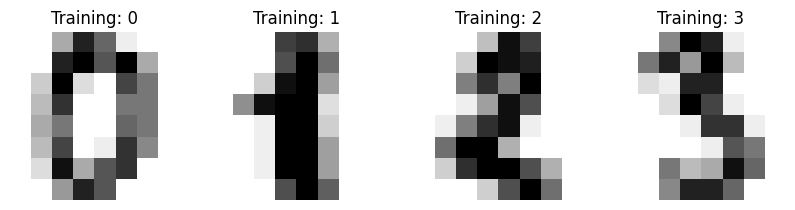

In [64]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

## **Data Preprocessing**

In [65]:
df.images.shape

(1797, 8, 8)

In [66]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [67]:
df.images[0].shape

(8, 8)

In [68]:
len(df.images)

1797

In [69]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [70]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [71]:
data[0].shape

(64,)

In [72]:
data.shape

(1797, 64)

## **Scaling Image Data**

In [73]:
data.min()

0.0

In [74]:
data.max()

16.0

In [75]:
data = data/16

In [76]:
data.min()

0.0

In [77]:
data.max()

1.0

In [78]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Define Target Variable (y) and Feature Variables (X)**

In [79]:
x = data
y = df.target

## **Train Test Split**

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.7)

In [82]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Modeling - Random Forest Model**

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rf = RandomForestClassifier()

In [86]:
rf.fit(X_train, y_train)

RandomForestClassifier()

## **Prediction**

In [87]:
y_pred = rf.predict(X_test)

In [88]:
y_pred

array([2, 3, 4, 5, 5, 2, 3, 7, 6, 8, 8, 7, 1, 9, 2, 7, 8, 3, 1, 9, 2, 1,
       3, 9, 5, 6, 5, 0, 2, 3, 5, 2, 2, 4, 8, 9, 6, 8, 3, 9, 8, 5, 2, 9,
       6, 1, 0, 2, 2, 1, 0, 6, 5, 9, 9, 5, 4, 2, 6, 3, 9, 2, 4, 1, 1, 5,
       0, 0, 0, 9, 6, 1, 5, 7, 5, 4, 6, 7, 2, 5, 5, 7, 7, 5, 4, 4, 3, 3,
       4, 7, 9, 1, 1, 1, 4, 4, 9, 2, 0, 6, 6, 8, 5, 7, 8, 8, 7, 1, 3, 6,
       4, 3, 2, 0, 2, 3, 5, 1, 1, 0, 3, 0, 3, 9, 6, 3, 2, 3, 1, 6, 6, 4,
       8, 5, 4, 1, 1, 7, 6, 8, 8, 0, 9, 9, 3, 6, 3, 7, 2, 1, 0, 7, 5, 3,
       4, 6, 6, 7, 1, 8, 0, 4, 8, 9, 1, 5, 4, 7, 5, 2, 4, 5, 2, 0, 2, 1,
       8, 7, 3, 3, 0, 3, 5, 6, 3, 4, 3, 0, 3, 2, 2, 9, 3, 4, 5, 9, 6, 1,
       7, 9, 2, 2, 7, 2, 1, 6, 8, 1, 5, 7, 7, 9, 7, 5, 7, 9, 7, 8, 8, 3,
       9, 3, 1, 9, 7, 9, 6, 5, 4, 2, 7, 7, 2, 3, 1, 7, 0, 0, 9, 3, 8, 2,
       9, 7, 5, 0, 4, 0, 1, 5, 4, 4, 0, 3, 1, 4, 5, 2, 0, 3, 4, 3, 2, 9,
       0, 0, 0, 3, 6, 8, 6, 2, 0, 2, 5, 3, 4, 2, 0, 3, 9, 7, 2, 8, 7, 3,
       1, 4, 9, 5, 7, 3, 1, 5, 3, 4, 0, 3, 4, 4, 9,

## **Model Accuracy**

In [92]:
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
confusion_matrix(y_test, y_pred)

array([[53,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 61,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 44,  0,  0,  0,  0,  2],
       [ 1,  0,  0,  0,  0, 54,  1,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 53,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 63,  0,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 43,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  0,  0, 49]])

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.96      1.00      0.98        55
           2       1.00      1.00      1.00        52
           3       0.97      1.00      0.98        61
           4       0.98      0.96      0.97        46
           5       1.00      0.95      0.97        57
           6       0.98      0.96      0.97        55
           7       1.00      0.98      0.99        64
           8       0.98      0.98      0.98        44
           9       0.92      0.94      0.93        52

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



## **Explaination**

In this project we had classified hand written digits, we had collected the data from from sklearn.datasets import load_digits and performed some programming.

After importing data, we had performed data preprocessing techniques on the images.

Performed Image Data scaling in the range of 0 to 1.

Defining the Target variable x and y and performing train_test_split.

Modelling the data with RandomForestClassifier because It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

Atlast predicting the model and getting the accuracy.